In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score, accuracy_score,precision_score,recall_score,roc_curve,roc_auc_score

In [215]:
train_df = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Titanic Predicitons_logistic_reg\train.csv')
test_df = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Titanic Predicitons_logistic_reg\test.csv')
submission = pd.read_csv(r'E:\INCEPTEZ\Training\Basics_python\Titanic Predicitons_logistic_reg\gender_submission.csv')

In [216]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
train_df.shape , test_df.shape

((891, 12), (418, 11))

In [218]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [219]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### . Total Number of male & feamle in our dataset 

Text(0.5, 1.0, 'How many Men and Women in train_df')

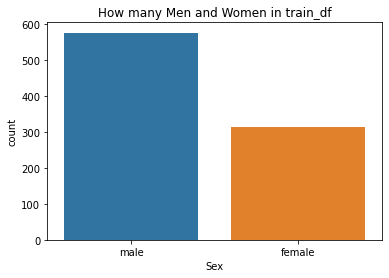

In [220]:
sns.countplot(x='Sex',data=train_df).set_title('How many Men and Women in train_df')

### Total Number of male & feamle Survived


<AxesSubplot:xlabel='Sex', ylabel='count'>

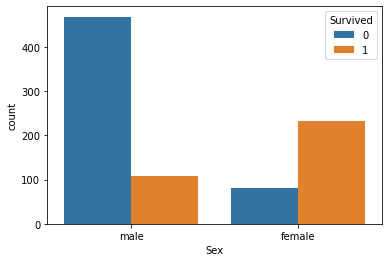

In [221]:
sns.countplot(x='Sex',data=train_df,hue='Survived')

### Check Survived Percentage   -  38 percent survived

In [222]:
train_df['Survived'].value_counts(dropna=False, normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

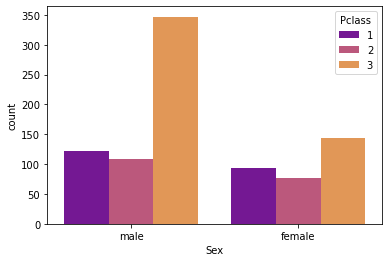

In [223]:
sns.countplot(x='Sex',data=train_df,hue='Pclass',palette='plasma')

<AxesSubplot:xlabel='Sex', ylabel='count'>

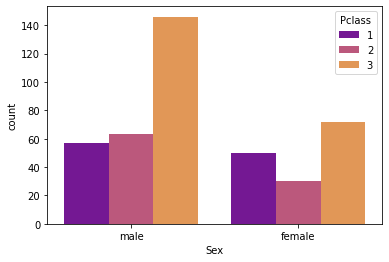

In [224]:
sns.countplot(x='Sex',data=test_df,hue='Pclass',palette='plasma')

### Preprocessing

In [225]:
train_df = train_df.drop(["PassengerId","Name","Ticket"], axis=1)

In [226]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### We see that the features Cabin, Age and Embarked have missing values in train_df.

### Let's Fill MISSING VALUES FOR Train Data.

Cabin Featueres has more than 75% of missing data in both Test and train data so we are going to use get_dummies to fill these data.

In [227]:
train_df["Cabin"] = train_df["Cabin"].isna()
train_df = pd.get_dummies(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Cabin       891 non-null    bool   
 7   Sex_female  891 non-null    uint8  
 8   Sex_male    891 non-null    uint8  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: bool(1), float64(2), int64(4), uint8(5)
memory usage: 47.1 KB


### Since Age is a numeric variable, lets fill with random numbers computed based on mean

In [228]:
train_df["Age"][train_df["Age"].isna()] = train_df["Age"].mean()
train_df.count()

C:\Users\MUTHUK~1\AppData\Local\Temp/ipykernel_9324/1556003216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Age"][train_df["Age"].isna()] = train_df["Age"].mean()


Survived      891
Pclass        891
Age           891
SibSp         891
Parch         891
Fare          891
Cabin         891
Sex_female    891
Sex_male      891
Embarked_C    891
Embarked_Q    891
Embarked_S    891
dtype: int64

### Let's Fill MISSING VALUES FOR Test Data.

Since Age is a numeric variable, lets fill with random numbers computed based on mean.

In [229]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

In [230]:
test_df["Cabin"] = test_df["Cabin"].isna()
test_df = pd.get_dummies(test_df)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Columns: 793 entries, PassengerId to Embarked_S
dtypes: bool(1), float64(2), int64(4), uint8(786)
memory usage: 341.0 KB


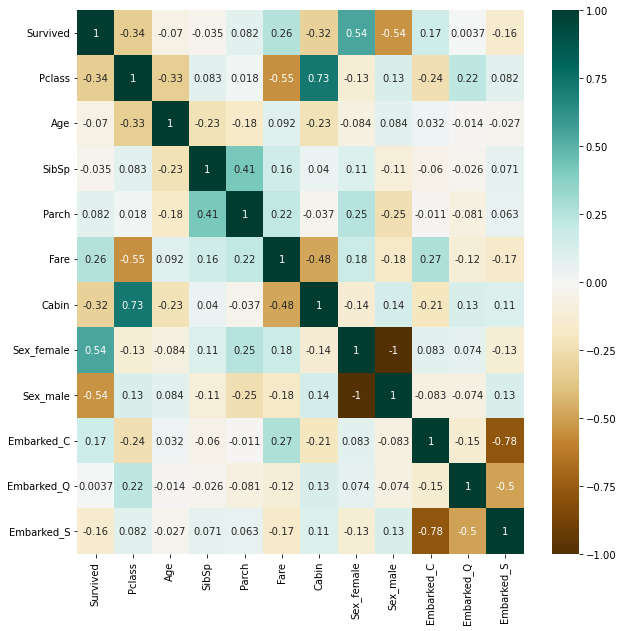

In [231]:
sns.heatmap(train_df.corr(),annot=True,cmap='BrBG') #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

###  Concetanating data both train and test

In [232]:
data =pd.concat([train_df,test_df])

In [233]:
data.reset_index(inplace=True, drop=True)
display(data.head(1), data.tail(1))

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,...,Ticket_SOTON/OQ 392083,Ticket_STON/O 2. 3101268,Ticket_STON/O 2. 3101291,Ticket_STON/O2. 3101270,Ticket_STON/OQ. 369943,Ticket_W./C. 14260,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W.E.P. 5734
0,0.0,3,22.0,1,0,7.25,True,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Embarked_C,...,Ticket_SOTON/OQ 392083,Ticket_STON/O 2. 3101268,Ticket_STON/O 2. 3101291,Ticket_STON/O2. 3101270,Ticket_STON/OQ. 369943,Ticket_W./C. 14260,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W.E.P. 5734
1308,NaN,3,27.0,1,1,22.3583,True,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
preprc_train = data[data['Survived'].notna()]
preprc_test = data[data['Survived'].isna()]

In [235]:
preprc_train.to_csv('preprocessed_titanic_train_data.csv',index=False)
preprc_test.to_csv('preprocessed_titanic_test_data.csv',index=False)

### Model_training

In [236]:
pptrain = pd.read_csv('preprocessed_titanic_train_data.csv')

In [237]:
x = pptrain.drop("Survived",axis=1)
y = pptrain["Survived"]

In [238]:
train_X, test_X, train_y, test_y = train_test_split(x,y, test_size = 0.2,random_state = 10)

In [239]:
X_train.shape, y_train.shape, X_test.shape

((891, 11), (891,), (179, 11))

In [240]:
train_X = train_X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
train_y = train_y.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
test_X = test_X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
test_y = test_y.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [241]:
model = LogisticRegression(max_iter=500)

In [242]:
model.fit(train_X,train_y)

LogisticRegression(max_iter=500)

In [243]:
y_pred = model.predict(train_X)
print('Train accuracy')
print('accuracy score',accuracy_score(train_y,y_pred))
print('f1 score',f1_score(train_y,y_pred))
print('confusion matrix\n',confusion_matrix(train_y,y_pred))

Train accuracy
accuracy score 0.7935393258426966
f1 score 0.7282809611829945
confusion matrix
 [[368  64]
 [ 83 197]]


In [244]:
y_test_pred = model.predict(test_X)
print('Test accuracy')
print('accuracy score',accuracy_score(test_y,y_test_pred))
print('f1 score',f1_score(test_y,y_test_pred))
print('confusion matrix\n',confusion_matrix(test_y,y_test_pred))

Test accuracy
accuracy score 0.8212290502793296
f1 score 0.7460317460317459
confusion matrix
 [[100  17]
 [ 15  47]]


In [245]:
pptest_org = pd.read_csv('preprocessed_titanic_test_data.csv')

In [246]:
pptest_X = pptest_org.drop("Survived",axis=1)
pptest_X = pptest_X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
y_unpred = model.predict(pptest_X)

In [247]:
submission['Survived']=y_unpred

In [248]:
submission['Survived']=submission['Survived'].astype(int)
submission.to_csv('titanic_submission_logreg.csv',index=False)

In [249]:
np.unique(submission['Survived'], return_counts=True)

(array([0, 1]), array([256, 162], dtype=int64))